In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sci
import matplotlib.pyplot as plt

In [40]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',None)
pd.options.display.float_format = '{:.2f}'.format

# Trabajo FINAL
Análisis sobre un data frame acerca de datos históricos de los jugadores en la Premier League 2020

In [41]:
df = pd.read_csv("dataset - 2020-09-24.csv")

### Para comenzar, nos damos una idea inicial acerca de la base de datos 

In [42]:
df.shape

(571, 59)

In [43]:
df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [44]:
df.sample(4)

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
416,John Egan,12.00,Sheffield-United,Defender,Ireland,27.00,38,14,13,2,NaN,1.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,12.00,32.00,46.00,61%,1.00,14.00,58.00,168.00,79.00,0.00,181.00,204.00,133.00,1.00,138.00,80.00,0.00,1.00,0,1340,35.26,1.00,3.00,3%,0.00,114.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,37,1.00
122,César Azpilicueta,28.00,Chelsea,Defender,Spain,31.00,272,158,56,8,NaN,2.00,6.00,0.00,NaN,NaN,NaN,NaN,NaN,1.00,NaN,95.00,276.00,722.00,73%,2.00,29.00,475.00,788.00,416.00,5.00,1376.00,1400.00,977.00,69.00,475.00,375.00,3.00,0.00,31,15647,57.53,32.00,577.00,22%,25.00,633.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,240,10.00
136,Billy Gilmour,23.00,Chelsea,Midfielder,Scotland,19.00,6,5,0,0,6.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1%,0.00,0.00,NaN,NaN,5.00,40%,NaN,0.00,3.00,2.00,1.00,NaN,15.00,10.00,16.00,2.00,2.00,5.00,NaN,0.00,0,172,28.67,0.00,1.00,1%,0.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,0.00
251,Patrick Bamford,9.00,Leeds-United,Forward,England,27.00,29,4,20,3,0.10,1.00,2.00,0.00,0.00,0.00,20.00,9.00,45%,1.00,2.00,NaN,NaN,14.00,NaN,NaN,6.00,6.00,9.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,193,6.66,0.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,23,7.00


In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Jersey Number,563.00,19.53,14.27,1.00,8.00,18.00,27.00,82.00
Age,570.00,25.79,4.38,17.00,22.00,26.00,29.00,38.00
Appearances,571.00,68.82,81.80,0.00,3.00,36.00,108.00,539.00
Wins,571.00,28.96,38.97,0.00,1.00,12.00,41.00,272.00
Losses,571.00,23.90,28.49,0.00,1.00,14.00,36.00,158.00
Goals,571.00,7.33,16.81,0.00,0.00,1.00,6.00,180.00
Goals per match,309.00,2.65,8.00,0.00,0.05,0.14,0.39,57.00
Headed goals,502.00,1.41,3.43,0.00,0.00,0.00,1.00,31.00
Goals with right foot,502.00,4.47,11.05,0.00,0.00,1.00,3.00,127.00
Goals with left foot,502.00,2.39,6.30,0.00,0.00,0.00,2.00,63.00


In [46]:
pd.isnull(df).sum()

Name                        0
Jersey Number               8
Club                        0
Position                    0
Nationality                 1
Age                         1
Appearances                 0
Wins                        0
Losses                      0
Goals                       0
Goals per match           262
Headed goals               69
Goals with right foot      69
Goals with left foot       69
Penalties scored          262
Freekicks scored          262
Shots                     262
Shots on target           262
Shooting accuracy %       262
Hit woodwork               69
Big chances missed        262
Clean sheets              309
Goals conceded            309
Tackles                    69
Tackle success %          181
Last man tackles          378
Blocked shots              69
Interceptions              69
Clearances                 69
Headed Clearance           69
Clearances off line       378
Recoveries                181
Duels won                 181
Duels lost

In [47]:
df.loc[df['Age'].isnull() == True]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
241,Ezgjan Alioski,10.00,Leeds-United,Midfielder,NaN,NaN,1,1,0,0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,100%,0.00,0.00,NaN,NaN,1.00,100%,NaN,0.00,1.00,0.00,0.00,NaN,2.00,2.00,4.00,0.00,0.00,1.00,NaN,0.00,0,11,11.00,0.00,1.00,1%,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.00


### Dada la inconsistencia de la información en esta tabla (0 goles pero 1 gol por partido), decidimos eliminar al jugador

In [48]:
df.drop([241], axis=0, inplace=True)

In [49]:
df.loc[(df['Goals per match'].isnull() == False) & (df['Position'] ==  'Defender')]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
41,Kortney Hause,30.00,Aston-Villa,Defender,England,25.00,18,3,11,1,0.06,0.00,1.00,0.00,0.00,0.00,20.00,3.00,15%,0.00,3.00,NaN,NaN,21.00,43%,NaN,2.00,20.00,94.00,51.00,NaN,109.00,138.00,77.00,9.00,100.00,35.00,NaN,1.00,0,799,44.39,1.00,0.00,0%,1.00,62.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,24,1.00
326,Oleksandr Zinchenko,11.00,Manchester-City,Defender,Ukraine,23.00,41,34,6,0,41.00,0.00,0.00,0.00,0.00,0.00,28.00,6.00,21%,0.00,0.00,NaN,NaN,88.00,63%,NaN,11.00,43.00,42.00,27.00,NaN,188.00,173.00,161.00,11.00,66.00,58.00,NaN,2.00,3,3066,74.78,5.00,101.00,20%,3.00,86.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,35,4.00
531,Ben Johnson,31.00,West-Ham-United,Defender,England,20.00,4,1,1,0,4.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1%,0.00,0.00,NaN,NaN,9.00,44%,NaN,0.00,4.00,13.00,3.00,NaN,13.00,18.00,20.00,1.00,7.00,5.00,NaN,0.00,0,135,33.75,0.00,11.00,18%,0.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,8,0.00


#
 Debido a la inconsistencia en la columna "Goals per match" (se puede observar 41 goles por partido en el jugador 326), junto a la gran cantidad de nulos con las que contaba, decidimos borrar la columna y crearla manualmente

In [50]:
df.drop(columns= 'Goals per match', inplace = True)

In [51]:
df["Goles por partido"] = df["Goals"] / df["Appearances"]

In [52]:
df["Goles por partido"].fillna(0, inplace = True) 
#Aquellos jugadores que tenían 0 Appearances, lógicamente iban a tener este valor como Nan. Los rellenamos  así

In [53]:
df["Goles por partido"].isnull().sum()

0

In [54]:
df.loc[df['Goles por partido'].isnull() == True]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido


# OBJETIVOS DELANTEROS: Búsqueda de Infravalorados


Luego de limpiar un poco el df, pasamos a centrarnos en el objetivo de este análisis: Realizar un estudio posición por posición según un criterio que nos pareciera interesante analizar. 

Para el caso de los delanteros, decidimos enfocar el análisis en detectar jugadores "infravalorados", es decir, aquellos jugadores cuyo rendimiento es alto, y que aún así no se encuentran jugando dentro de los equipos más poderosos de la liga.
Para el caso de los delanteros, decidimos evaluarlos según sus goles por partido y acierto en los tiros.

Como se puede ver en los siguientes gráficos, estas son métricas en donde esta posición destaca por sobre las demás


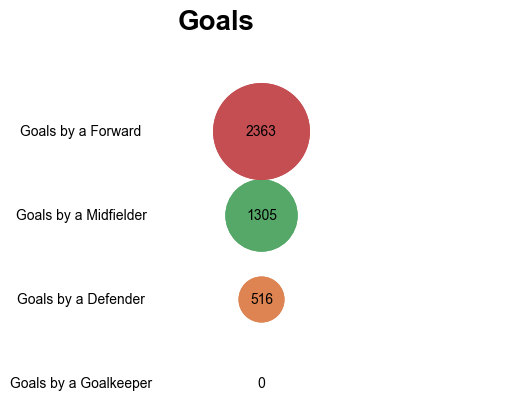

In [55]:
fig, ax = plt.subplots(1, 1)
positions = ["Goalkeeper", "Defender", "Midfielder", "Forward"]
cond="Goals"
y=1
n=2
for pos in positions:
    condicion=df["Position"]==pos
    tamaño=df.loc[condicion,cond].sum()*n
    textocond=cond + " by a " + pos
    dibujo = plt.scatter(1,y,s=tamaño,marker="o")
    plt.text(0.96,y,textocond,size=10,horizontalalignment="center",verticalalignment="center",color="#000000")
    plt.text(1,y,str(round(tamaño/n)),size=10,horizontalalignment="center",verticalalignment="center",color="#000000")
    ax.add_artist(dibujo)
    y=y+1
plt.text(0.99,y+0.3,cond,size=20,horizontalalignment="center",verticalalignment="center",color="#000000",weight='bold')
dibujo = plt.scatter(1,y+0.0001,s=0,marker="o")
plt.axis('off')
plt.show()

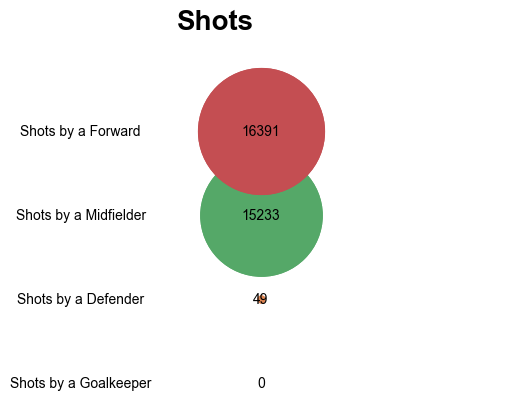

In [56]:
fig, ax = plt.subplots(1, 1)
positions = ["Goalkeeper", "Defender", "Midfielder", "Forward"]
cond="Shots"
y=1
n=0.5
for pos in positions:
    condicion=df["Position"]==pos
    tamaño=df.loc[condicion,cond].sum()*n
    textocond=cond + " by a " + pos
    dibujo = plt.scatter(1,y,s=tamaño,marker="o")
    plt.text(0.96,y,textocond,size=10,horizontalalignment="center",verticalalignment="center",color="#000000")
    plt.text(1,y,str(round(tamaño/n)),size=10,horizontalalignment="center",verticalalignment="center",color="#000000")
    ax.add_artist(dibujo)
    y=y+1
plt.text(0.99,y+0.3,cond,size=20,horizontalalignment="center",verticalalignment="center",color="#000000",weight='bold')
dibujo = plt.scatter(1,y+0.0001,s=0,marker="o")
plt.axis('off')
plt.show()

# Goles por partido

In [57]:
df.groupby("Position")[['Goles por partido']].mean() #Buscamos la media de los goles por partido en delanteros

,Goles por partido
Position,
Defender,0.03
Forward,0.18
Goalkeeper,0.00
Midfielder,0.08


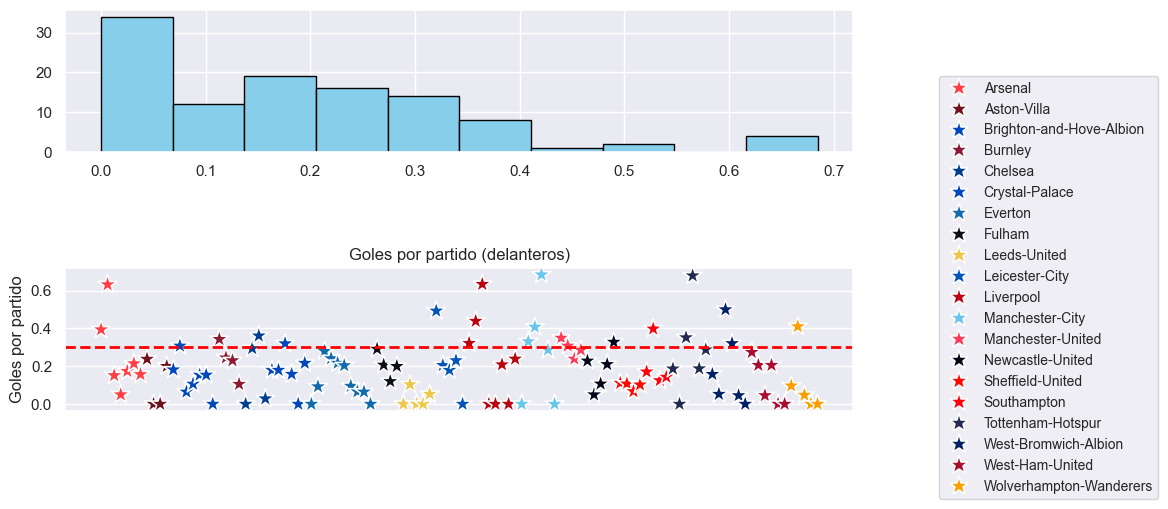

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plt.tight_layout(pad = 5)
paleta= ["#FF3F45","#6F121D", "#0048BB", "#8C1A33","#003F8F","#0047BD", "#1269AC","#0C0F16","#EEC64A","#0453BA","#B90310", "#69C5EA", "#FF3B59", "#04071A","#FC0901", "#FF010C","#212A51","#002166", "#A90E30","#FC9E00"]
axes[0].hist(df[df["Position"] == "Forward"]['Goles por partido'], bins= 10, color='skyblue', edgecolor='black');
sns.scatterplot(data = df[df["Position"] == "Forward"], x= "Name", y = "Goles por partido", marker= '*', s = 200, hue = 'Club', palette = paleta,ax = axes[1]);
plt.axhline(y=0.3, color='red', linestyle='--', linewidth=2)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.xlabel(None)
plt.title("Goles por partido (delanteros)")
plt.legend (fontsize = "10", bbox_to_anchor=(1.1, 2.4));

En base a los gráficos, podemos determinar que tener 0.3 goles por partido es un buen registro para los delanteros, y ampliamente superior a la media de 0.18 goles por partido para los delanteros de la liga. Filtraremos por esa condición:

Los clubes más poderosos de la liga son los llamados "Big Six". Lógicamente, poseen la mayoría de los jugadores con mejores registros debido a su status de clubes de élite y el diferencial del dinero con el que cuentan dentro de la liga. El objetivo, cómo mencionamos previamente, es buscar los jugadores con los mejores registros que no se encuentren en estos clubes

In [59]:
big_six = ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester-United', 'Manchester-City', 'Tottenham-Hotspur']
mejores_en_gxp = df.loc[(df['Goles por partido'] >= 0.3)&(df['Position'] == 'Forward')&(df['Club'].apply(lambda x: x not in big_six))]
# la función lambda está para filtrar aquellos jugadores que no pertenecen al "Big Six"

In [60]:
mejores_en_gxp

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido
85,Neal Maupay,9.00,Brighton-and-Hove-Albion,Forward,France,24.00,39,10,16,12,3.00,3.00,6.00,2.00,0.00,101.00,41.00,41%,1.00,11.00,NaN,NaN,21.00,NaN,NaN,31.00,5.00,9.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,710,18.21,3.00,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,38,15.00,0.31
111,Chris Wood,9.00,Burnley,Forward,New Zealand,28.00,105,35,43,36,14.00,14.00,8.00,1.00,0.00,172.00,81.00,47%,7.00,36.00,NaN,NaN,28.00,NaN,NaN,22.00,7.00,62.00,44.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1535,14.62,8.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,84,117.00,0.34
169,Christian Benteke,17.00,Crystal-Palace,Forward,Belgium,29.00,225,73,107,72,26.00,37.00,9.00,10.00,1.00,544.00,208.00,38%,14.00,82.00,NaN,NaN,80.00,NaN,NaN,117.00,26.00,214.00,148.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,5666,25.18,31.00,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,3,357,203.00,0.32
281,Jamie Vardy,9.00,Leicester-City,Forward,England,33.00,213,86,77,105,12.00,66.00,27.00,20.00,0.00,458.00,223.00,49%,15.00,78.00,NaN,NaN,124.00,NaN,NaN,82.00,59.00,90.00,62.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,2961,13.90,50.00,256.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,3,179,195.00,0.49
407,Callum Wilson,13.00,Newcastle-United,Forward,England,28.00,128,39,60,42,7.00,26.00,7.00,5.00,0.00,226.00,91.00,40%,5.00,42.00,NaN,NaN,41.00,NaN,NaN,47.00,19.00,48.00,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,1694,13.23,21.00,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,177,94.00,0.33
457,Danny Ings,9.00,Southampton,Forward,England,28.00,113,32,47,45,7.00,24.00,13.00,6.00,0.00,268.00,108.00,40%,10.00,26.00,NaN,NaN,106.00,NaN,NaN,65.00,37.00,45.00,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1938,17.15,14.00,94.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,91,43.00,0.40
516,Matheus Pereira,12.00,West-Bromwich-Albion,Forward,Brazil,24.00,2,0,2,1,0.00,0.00,1.00,0.00,1.00,4.00,2.00,50%,0.00,0.00,NaN,NaN,1.00,NaN,NaN,1.00,3.00,2.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,56,28.00,0.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,0.00,0.50
517,Charlie Austin,15.00,West-Bromwich-Albion,Forward,England,31.00,106,25,55,34,11.00,20.00,3.00,6.00,0.00,255.00,106.00,42%,6.00,34.00,NaN,NaN,62.00,NaN,NaN,78.00,17.00,84.00,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1500,14.15,7.00,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,83,68.00,0.32
567,Raúl Jiménez,9.00,Wolverhampton-Wanderers,Forward,Mexico,29.00,78,32,23,32,9.00,19.00,4.00,6.00,0.00,237.00,82.00,35%,7.00,20.00,NaN,NaN,51.00,NaN,NaN,53.00,43.00,75.00,57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2108,27.03,26.00,57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.00,0.41


# Precisión en los tiros

Debido a que la columna "Shooting accuracy %" funciona como string, decidimos crearla manualmente, salvando los valores nulos de la misma forma que con los goles por partido:

In [61]:
df.drop(columns= 'Shooting accuracy %', inplace = True)

In [62]:
df['Precision en tiros %'] = df['Shots on target']/df['Shots'] * 100

In [63]:
df.loc[df["Position"] == 'Forward']['Precision en tiros %'].mean()

37.10188240016443

In [64]:
df.loc[df["Position"] == 'Forward']['Precision en tiros %'].max()

54.054054054054056

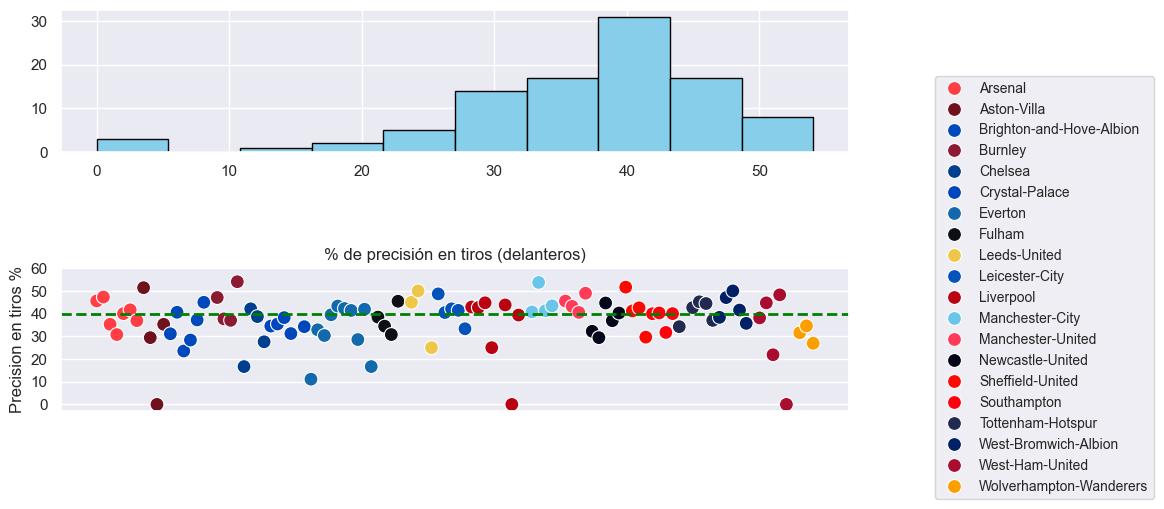

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6));
plt.tight_layout(pad = 5)
axes[0].hist(df[df["Position"] == "Forward"]['Precision en tiros %'], color='skyblue', edgecolor='black');
sns.scatterplot(data = df[df["Position"] == "Forward"], x= "Name", y = "Precision en tiros %", marker= 'o', s = 100, hue = 'Club', palette = paleta,ax = axes[1]);
plt.axhline(y=40, color='green', linestyle='--', linewidth=2)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([0,10,20,30,40,50,60])
plt.xlabel(None);
plt.title("% de precisión en tiros (delanteros)");
plt.legend (fontsize = "10", bbox_to_anchor=(1.1, 2.4));

Con los los gráficos, los datos de las medias y los máximos para la precisión de los tiros de los delanteros, consideramos que un buen registro es superar el 40% de precisión. Nuevamente, nos quedamos con aquellos jugadores que cumplen esta condición y no pertenecen a los clubes del "Big Six"

In [66]:
mejores_en_precision = df.loc[(df['Precision en tiros %'] >= 40)&(df['Position'] == 'Forward')&(df['Club'].apply(lambda x: x not in big_six))]

In [67]:
mejores_en_precision

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido,Precision en tiros %
54,Wesley,9.00,Aston-Villa,Forward,Brazil,23.00,21,6,12,5,0.00,5.00,0.00,0.00,0.00,35.00,18.00,1.00,5.00,NaN,NaN,15.00,NaN,NaN,8.00,4.00,23.00,18.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,367,17.48,1.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,43,14.00,0.24,51.43
85,Neal Maupay,9.00,Brighton-and-Hove-Albion,Forward,France,24.00,39,10,16,12,3.00,3.00,6.00,2.00,0.00,101.00,41.00,1.00,11.00,NaN,NaN,21.00,NaN,NaN,31.00,5.00,9.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,710,18.21,3.00,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,38,15.00,0.31,40.59
89,Florin Andone,21.00,Brighton-and-Hove-Albion,Forward,Romania,27.00,26,5,14,4,2.00,2.00,0.00,0.00,0.00,20.00,9.00,0.00,3.00,NaN,NaN,11.00,NaN,NaN,6.00,3.00,13.00,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,177,6.81,0.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,1,30,4.00,0.15,45.00
111,Chris Wood,9.00,Burnley,Forward,New Zealand,28.00,105,35,43,36,14.00,14.00,8.00,1.00,0.00,172.00,81.00,7.00,36.00,NaN,NaN,28.00,NaN,NaN,22.00,7.00,62.00,44.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1535,14.62,8.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,84,117.00,0.34,47.09
114,Matej Vydra,27.00,Burnley,Forward,Czech Republic,28.00,57,11,30,6,0.00,5.00,1.00,0.00,0.00,37.00,20.00,1.00,10.00,NaN,NaN,10.00,NaN,NaN,5.00,5.00,13.00,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,359,6.30,4.00,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,9,10.00,0.11,54.05
198,Theo Walcott,11.00,Everton,Forward,England,31.00,346,176,93,75,3.00,60.00,12.00,0.00,0.00,616.00,267.00,18.00,79.00,NaN,NaN,214.00,NaN,NaN,141.00,149.00,81.00,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,5491,15.87,61.00,952.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0,101,163.00,0.22,43.34
199,Cenk Tosun,14.00,Everton,Forward,Turkey,29.00,49,14,19,10,5.00,3.00,2.00,0.00,0.00,71.00,30.00,0.00,6.00,NaN,NaN,23.00,NaN,NaN,12.00,6.00,16.00,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,619,12.63,4.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,50,19.00,0.20,42.25
200,Alex Iwobi,17.00,Everton,Forward,Nigeria,24.00,126,59,41,12,2.00,9.00,1.00,0.00,0.00,157.00,65.00,4.00,10.00,NaN,NaN,99.00,NaN,NaN,46.00,44.00,33.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,3921,31.12,23.00,151.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,42,6.00,0.10,41.40
202,Moise Kean,27.00,Everton,Forward,Italy,20.00,31,9,13,2,0.00,2.00,0.00,0.00,0.00,31.00,13.00,0.00,4.00,NaN,NaN,6.00,NaN,NaN,5.00,5.00,1.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,131,4.23,5.00,14.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,28,4.00,0.06,41.94
228,Aboubakar Kamara,47.00,Fulham,Forward,France,25.00,15,2,10,3,0.00,3.00,0.00,1.00,0.00,22.00,10.00,0.00,4.00,NaN,NaN,8.00,NaN,NaN,0.00,1.00,5.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,262,17.47,1.00,20.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,26,7.00,0.20,45.45


# Conclusiones DELANTEROS

Una vez realizado el análisis según las dos características que consideramos más importantes para los delanteros, podemos buscar aquellos que mejor se desempeñan cumpliendo con las condiciones propuestas

In [68]:
mejores_delanteros = df.loc[(df["Name"].isin(mejores_en_gxp["Name"]))&((df["Name"].isin(mejores_en_precision["Name"])))]
mejores_delanteros

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido,Precision en tiros %
85,Neal Maupay,9.00,Brighton-and-Hove-Albion,Forward,France,24.00,39,10,16,12,3.00,3.00,6.00,2.00,0.00,101.00,41.00,1.00,11.00,NaN,NaN,21.00,NaN,NaN,31.00,5.00,9.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,710,18.21,3.00,13.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,38,15.00,0.31,40.59
111,Chris Wood,9.00,Burnley,Forward,New Zealand,28.00,105,35,43,36,14.00,14.00,8.00,1.00,0.00,172.00,81.00,7.00,36.00,NaN,NaN,28.00,NaN,NaN,22.00,7.00,62.00,44.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1535,14.62,8.00,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,84,117.00,0.34,47.09
281,Jamie Vardy,9.00,Leicester-City,Forward,England,33.00,213,86,77,105,12.00,66.00,27.00,20.00,0.00,458.00,223.00,15.00,78.00,NaN,NaN,124.00,NaN,NaN,82.00,59.00,90.00,62.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,2961,13.90,50.00,256.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,3,179,195.00,0.49,48.69
407,Callum Wilson,13.00,Newcastle-United,Forward,England,28.00,128,39,60,42,7.00,26.00,7.00,5.00,0.00,226.00,91.00,5.00,42.00,NaN,NaN,41.00,NaN,NaN,47.00,19.00,48.00,31.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,1694,13.23,21.00,78.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,0,177,94.00,0.33,40.27
457,Danny Ings,9.00,Southampton,Forward,England,28.00,113,32,47,45,7.00,24.00,13.00,6.00,0.00,268.00,108.00,10.00,26.00,NaN,NaN,106.00,NaN,NaN,65.00,37.00,45.00,26.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,1938,17.15,14.00,94.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,91,43.00,0.40,40.30
516,Matheus Pereira,12.00,West-Bromwich-Albion,Forward,Brazil,24.00,2,0,2,1,0.00,0.00,1.00,0.00,1.00,4.00,2.00,0.00,0.00,NaN,NaN,1.00,NaN,NaN,1.00,3.00,2.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,56,28.00,0.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,3,0.00,0.50,50.00
517,Charlie Austin,15.00,West-Bromwich-Albion,Forward,England,31.00,106,25,55,34,11.00,20.00,3.00,6.00,0.00,255.00,106.00,6.00,34.00,NaN,NaN,62.00,NaN,NaN,78.00,17.00,84.00,52.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1500,14.15,7.00,54.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,83,68.00,0.32,41.57


In [69]:
df.loc[(df['Name'].apply(lambda x: x in mejores_en_gxp["Name"].unique()))&(df['Name'].apply(lambda x: x not in mejores_delanteros["Name"].unique()))]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido,Precision en tiros %
169,Christian Benteke,17.00,Crystal-Palace,Forward,Belgium,29.00,225,73,107,72,26.00,37.00,9.00,10.00,1.00,544.00,208.00,14.00,82.00,NaN,NaN,80.00,NaN,NaN,117.00,26.00,214.00,148.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,5666,25.18,31.00,36.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35,3,357,203.00,0.32,38.24
567,Raúl Jiménez,9.00,Wolverhampton-Wanderers,Forward,Mexico,29.00,78,32,23,32,9.00,19.00,4.00,6.00,0.00,237.00,82.00,7.00,20.00,NaN,NaN,51.00,NaN,NaN,53.00,43.00,75.00,57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,2108,27.03,26.00,57.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,81,52.00,0.41,34.60


De esta forma, podemos ver que de todos los que cumplían tener más de 0.3 en goles por partido, sólo 2 delanteros no cumplen con tener más del 40 % en precisión de tiro. 

El dataframe "Mejores_delanteros" incluye a todos aquellos delanteros que cumplen con todos los requisitos que consideramos importantes en este análisis.

Cómo detalle adicional, uno de los delanteros identificados (Matheus Pereira) cuenta con muy pocas apariciones. Nosotros decidimos no quitarlo, pero habría que tener en cuenta que sus datos están sujetos a un número pequeño de muestras, por lo que podrían cambiar rápidamente. 

# MEDIOCAMPISTAS

Para el caso de los mediocampistas, buscamos hacer un análisis un poco distinto para variar. 

En este caso no nos centraremos individualmente en los jugadores, sino que realizaremos un análisis basado en los clubes. Evaluaremos a los mediocampistas según su rendimiento ofensivo y defensivo.

Análisis ofensivo de los mediocampos

In [70]:
#Creamos un dataframe con los mediocampistas que posean al menos 10 partidos jugados. 
mediocampistas = df[(df["Position"] == "Midfielder")&(df["Appearances"] >= 10)] 
mediocampistas_ofensivo = mediocampistas.groupby("Club")[['Assists','Goals','Big chances created', 'Through balls']].sum()
mediocampistas_ofensivo

,Assists,Goals,Big chances created,Through balls
Club,,,,
Arsenal,86,47,99.00,192.00
Aston-Villa,23,28,31.00,13.00
Brighton-and-Hove-Albion,62,48,85.00,87.00
Burnley,75,38,102.00,71.00
Chelsea,60,68,84.00,169.00
Crystal-Palace,76,110,90.00,89.00
Everton,70,91,99.00,131.00
Fulham,7,6,15.00,28.00
Leeds-United,14,5,15.00,32.00


[]

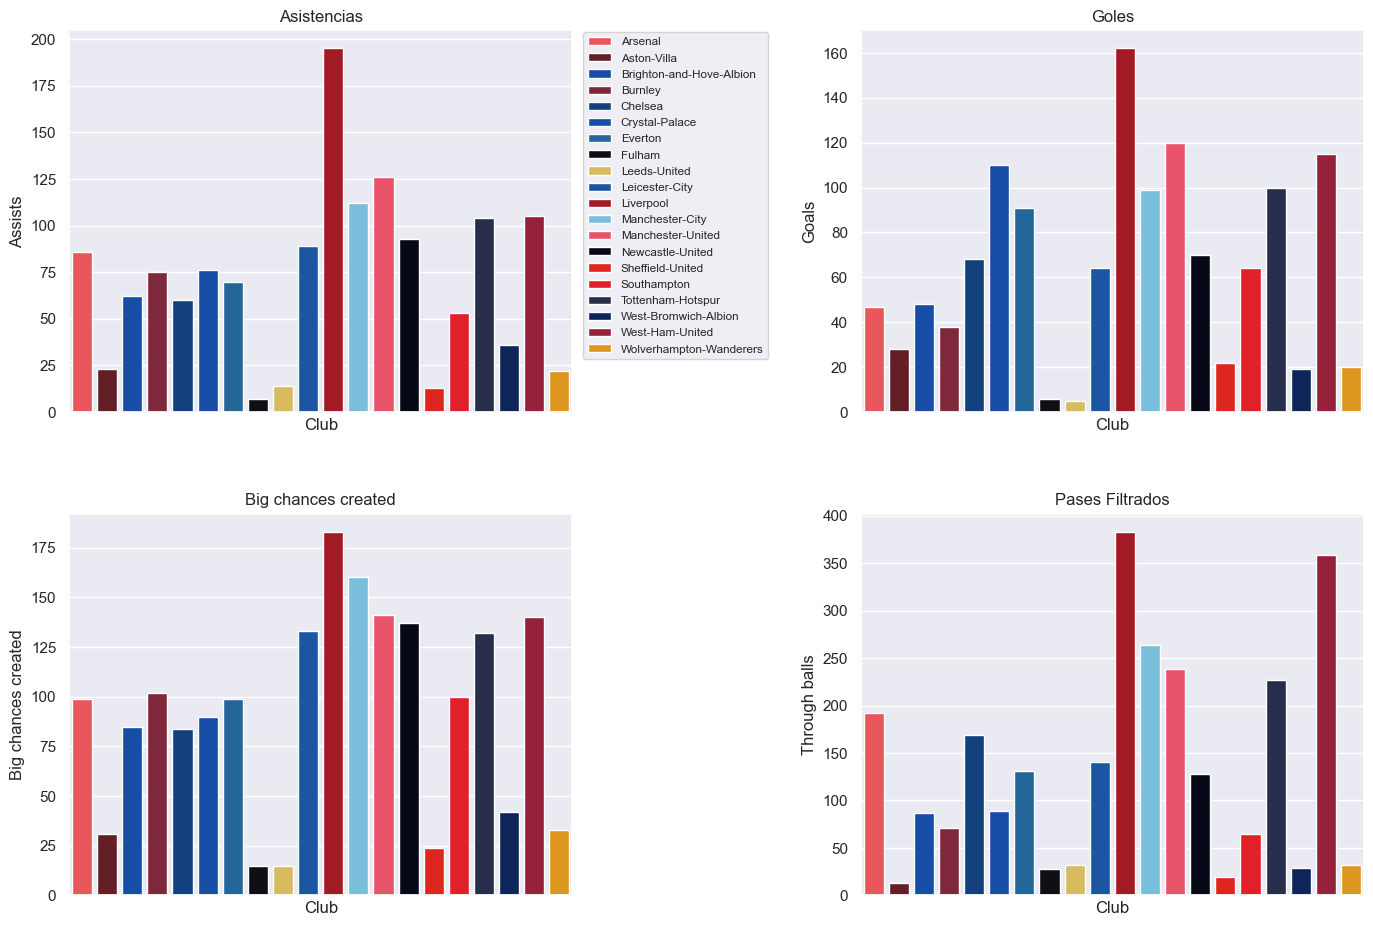

In [71]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(data = mediocampistas_ofensivo, x= "Club", y = "Assists",palette = paleta, hue = "Club", ax = axes[0,0], legend = True)
axes[0,0].set_title("Asistencias");
axes[0,0].legend(fontsize = "8.5",bbox_to_anchor=(1.01, 1.01));

sns.barplot(data = mediocampistas_ofensivo, x= "Club", y = "Goals",palette = paleta, hue = "Club", ax = axes[0,1], legend = False)
axes[0,1].set_title("Goles");

sns.barplot(data = mediocampistas_ofensivo, x= "Club", y = "Big chances created",palette = paleta, hue = "Club", ax = axes[1,0], legend = False)
axes[1,0].set_title("Big chances created");

sns.barplot(data = mediocampistas_ofensivo, x= "Club", y = "Through balls",palette = paleta,hue = "Club", ax = axes[1,1], legend = False)
axes[1,1].set_title("Pases Filtrados");

plt.tight_layout(pad= 2)

axes[0,0].xaxis.set_ticks([])
axes[0,1].xaxis.set_ticks([])
axes[1,0].xaxis.set_ticks([])
axes[1,1].xaxis.set_ticks([])


A partir de estos gráficos de barras, podemos buscar los límites por categoría y ver los equipos que más destacan

In [72]:
mas_asistencias = mediocampistas_ofensivo[mediocampistas_ofensivo['Assists'] >= 100]
mas_goles = mediocampistas_ofensivo[mediocampistas_ofensivo['Goals'] >= 90]
mas_ocasiones_creadas = mediocampistas_ofensivo[mediocampistas_ofensivo['Big chances created'] >= 125]
mas_pases_filtrados = mediocampistas_ofensivo[mediocampistas_ofensivo['Through balls'] >= 200]

In [73]:
mediocampistas_ofensivo.loc[(mediocampistas_ofensivo['Assists'].apply(lambda x: x in mas_asistencias["Assists"].unique()))&(mediocampistas_ofensivo['Goals'].apply(lambda x: x in mas_goles["Goals"].unique()))&(mediocampistas_ofensivo['Big chances created'].apply(lambda x: x in mas_ocasiones_creadas["Big chances created"].unique()))&(mediocampistas_ofensivo['Through balls'].apply(lambda x: x in mas_pases_filtrados["Through balls"].unique()))]

,Assists,Goals,Big chances created,Through balls
Club,,,,
Liverpool,195,162,183.00,383.00
Manchester-City,112,99,160.00,264.00
Manchester-United,126,120,141.00,238.00
Tottenham-Hotspur,104,100,132.00,227.00
West-Ham-United,105,115,140.00,358.00


De esta forma, concluimos que los mediocampistas de estos equipos son los que tienen mayor incidencia ofensiva en la liga

Análisis DEFENSIVO de los mediocampos

In [74]:
mediocampistas_defensivo = mediocampistas.groupby("Club")[['Tackles','Recoveries', 'Duels won','Interceptions']].sum()
mediocampistas_defensivo

,Tackles,Recoveries,Duels won,Interceptions
Club,,,,
Arsenal,859.00,2935.00,2343.00,500.00
Aston-Villa,285.00,1084.00,1185.00,198.00
Brighton-and-Hove-Albion,1160.00,3133.00,2617.00,655.00
Burnley,1234.00,3890.00,2859.00,1010.00
Chelsea,1087.00,3404.00,3090.00,724.00
Crystal-Palace,2705.00,6187.00,6356.00,1761.00
Everton,1267.00,3922.00,3258.00,870.00
Fulham,373.00,991.00,917.00,254.00
Leeds-United,118.00,379.00,292.00,90.00


[]

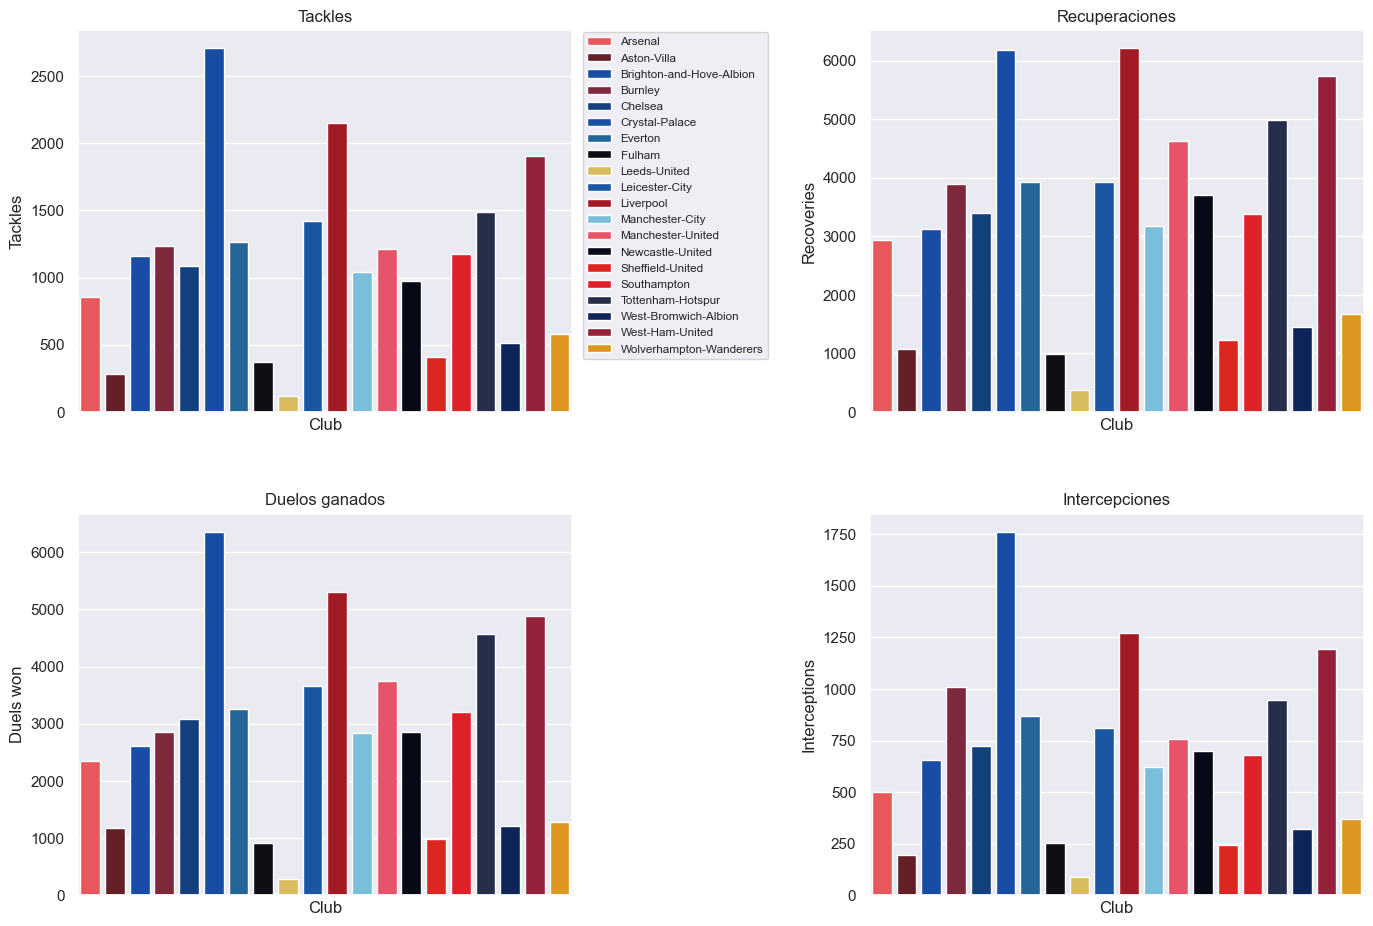

In [75]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(data = mediocampistas_defensivo, x= "Club", y = "Tackles",palette = paleta, hue = "Club", ax = axes[0,0], legend = True)
axes[0,0].set_title("Tackles");
axes[0,0].legend(fontsize = "8.5",bbox_to_anchor=(1.01, 1.01));

sns.barplot(data = mediocampistas_defensivo, x= "Club", y = "Recoveries",palette = paleta, hue = "Club", ax = axes[0,1], legend = False)
axes[0,1].set_title("Recuperaciones");

sns.barplot(data = mediocampistas_defensivo, x= "Club", y = "Duels won",palette = paleta, hue = "Club", ax = axes[1,0], legend = False)
axes[1,0].set_title("Duelos ganados");

sns.barplot(data = mediocampistas_defensivo, x= "Club", y = "Interceptions",palette = paleta,hue = "Club", ax = axes[1,1], legend = False)
axes[1,1].set_title("Intercepciones");

plt.tight_layout(pad= 2)

axes[0,0].xaxis.set_ticks([])
axes[0,1].xaxis.set_ticks([])
axes[1,0].xaxis.set_ticks([])
axes[1,1].xaxis.set_ticks([])


In [76]:
mas_tackles = mediocampistas_defensivo[mediocampistas_defensivo['Tackles'] >= 1000]
mas_recuperaciones = mediocampistas_defensivo[mediocampistas_defensivo['Recoveries'] >= 3500]
mas_duelos_ganados = mediocampistas_defensivo[mediocampistas_defensivo['Duels won'] >= 2700]
mas_intercepciones = mediocampistas_defensivo[mediocampistas_defensivo['Interceptions'] >= 500]

In [77]:
mediocampistas_defensivo.loc[(mediocampistas_defensivo['Tackles'].apply(lambda x: x in mas_tackles["Tackles"].unique()))&(mediocampistas_defensivo['Recoveries'].apply(lambda x: x in mas_recuperaciones["Recoveries"].unique()))&(mediocampistas_defensivo['Duels won'].apply(lambda x: x in mas_duelos_ganados["Duels won"].unique()))&(mediocampistas_defensivo['Interceptions'].apply(lambda x: x in mas_intercepciones["Interceptions"].unique()))]

,Tackles,Recoveries,Duels won,Interceptions
Club,,,,
Burnley,1234.00,3890.00,2859.00,1010.00
Crystal-Palace,2705.00,6187.00,6356.00,1761.00
Everton,1267.00,3922.00,3258.00,870.00
Leicester-City,1420.00,3923.00,3654.00,810.00
Liverpool,2152.00,6209.00,5302.00,1270.00
Manchester-United,1212.00,4628.00,3756.00,758.00
Tottenham-Hotspur,1487.00,4994.00,4565.00,945.00
West-Ham-United,1902.00,5730.00,4877.00,1192.00


Luego, en base a los datos analizados, concluimos que estos son los equipos cuyo mediocampo tiene más actuación en acciones defensivas del juego

# DEFENSORES

Para el caso de los defensores, se van a analizar tres atributos que consideramos fundamentales para definir
quién (o quiénes) es el más completo. El que resulte de este análisis debería ser codiciado por los grandes equipos.

Se analizan las siguientes tres estadísticas:

- **Vallas invictas por partido:** se llama valla invicta cuando al equipo no le hacen goles en un partido.
- **Duelos aéreos ganados:** los defensores suelen disputar la pelota en la altura (con su cabeza). Este atributo define cuántas veces ganan esa disputa.
- **Pases largos precisos por partido:** ya habiendo considerado dos atributos defensivos, se analiza un complemento más bien ofensivo. Un defensor que acostumbre a realizar buenos pases largos será fundamental para la salida del equipo.

Creemos que un defensor que esté por encima del promedio en estas tres variables tiene que ser considerado de los mejores defensores del mundo.

Cabe destacar que en todos los casos filtramos jugadores que hayan jugado más de 5 partidos, para no caer en un sesgo de insensibilidad al tamaño de muestra. Se adjuntan gráficos para notar que el número que se fija como límite para ser considerado "bueno" en esa categoría es siempre un número considerablemente por encima del promedio y que cumplen unos pocos.

### Vallas invictas por partido

In [78]:
# Se crea una variable para poder comparar entre defensores con distinta cantidad de partidos jugados.

vallas_invictas_por_partido = df['Clean sheets']/df['Appearances']
df['vallas_invictas_por_partido'] = vallas_invictas_por_partido
vallas_invictas_por_partido.mean()


0.22487688349929355

In [79]:
df.loc[(df['vallas_invictas_por_partido'] >= 0.38) & (df['Position'] == 'Defender') & (df['Appearances'] >= 5)]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido,Precision en tiros %,vallas_invictas_por_partido
291,Virgil van Dijk,4.00,Liverpool,Defender,Netherlands,29.00,159,98,30,14,11.00,0.00,3.00,NaN,NaN,NaN,NaN,12.00,NaN,61.00,145.00,184.00,70%,4.00,27.00,278.00,924.00,528.00,2.00,837.00,1083.00,397.00,41.00,776.00,269.00,0.00,3.00,3,10554,66.38,13.00,3.00,33%,11.00,737.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,88,4.00,0.09,NaN,0.38
292,Joseph Gomez,12.00,Liverpool,Defender,England,23.00,73,52,6,0,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,31.00,49.00,111.00,74%,1.00,4.00,100.00,166.00,78.00,0.00,406.00,322.00,245.00,39.00,140.00,109.00,0.00,0.00,3,4387,60.10,2.00,68.00,24%,2.00,196.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,0,58,1.00,0.00,NaN,0.42
327,Aymeric Laporte,14.00,Manchester-City,Defender,France,26.00,59,50,6,4,4.00,0.00,0.00,NaN,NaN,NaN,NaN,0.00,NaN,25.00,31.00,63.00,52%,0.00,7.00,70.00,147.00,88.00,0.00,342.00,226.00,144.00,8.00,127.00,79.00,0.00,0.00,3,4957,84.02,1.00,8.00,13%,1.00,274.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,40,2.00,0.07,NaN,0.42
352,Eric Bailly,3.00,Manchester-United,Defender,Cote D'Ivoire,26.00,54,35,7,1,0.00,1.00,0.00,NaN,NaN,NaN,NaN,1.00,NaN,21.00,35.00,92.00,67%,1.00,3.00,102.00,226.00,88.00,0.00,281.00,229.00,123.00,23.00,75.00,42.00,1.00,0.00,0,1682,31.15,0.00,2.00,2%,1.00,100.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,1,45,0.00,0.02,NaN,0.39


Si se cuenta con una defensa integrada por Virgil van Dijk, Joseph Gomez, Aymeric Laporte o Eric Bailly, muy probablemente al equipo no le hagan goles.

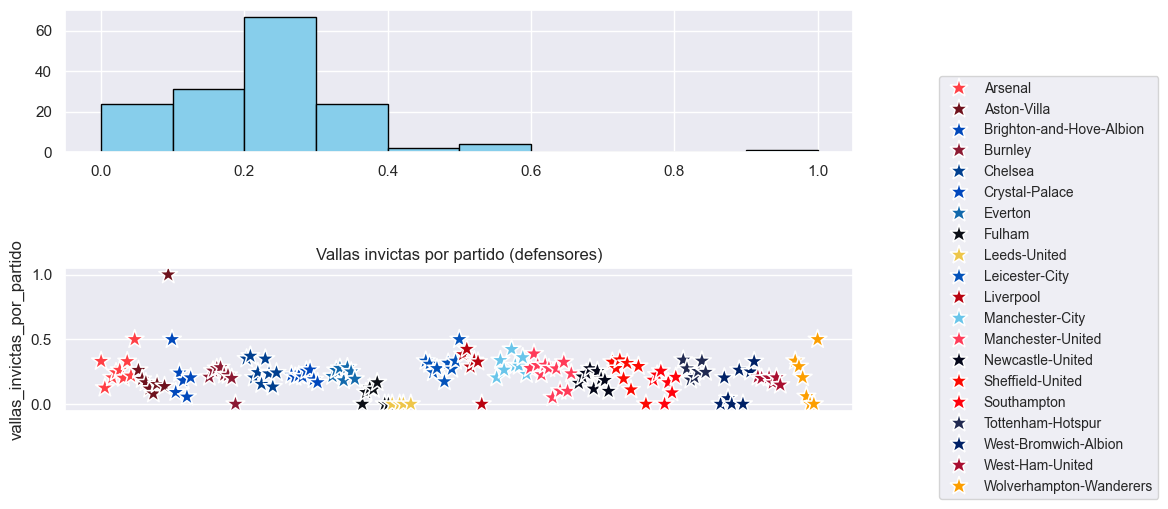

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plt.tight_layout(pad = 5)
paleta= ["#FF3F45","#6F121D", "#0048BB", "#8C1A33","#003F8F","#0047BD", "#1269AC","#0C0F16","#EEC64A","#0453BA","#B90310", "#69C5EA", "#FF3B59", "#04071A","#FC0901", "#FF010C","#212A51","#002166", "#A90E30","#FC9E00"]
axes[0].hist(df[df["Position"] == "Defender"]['vallas_invictas_por_partido'], bins= 10, color='skyblue', edgecolor='black');
sns.scatterplot(data = df[df["Position"] == "Defender"], x= "Name", y = "vallas_invictas_por_partido", marker= '*', s = 200, hue="Club", palette=paleta, ax = axes[1]);
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.xlabel(None)
plt.title("Vallas invictas por partido (defensores)")
plt.legend (fontsize = "10", bbox_to_anchor=(1.1,2.4));

El outlier observado arriba, perteneciente al Aston-Villa, se analiza debajo. Se puede ver que únicamente tiene un porcentaje de 100% porque jugó una sola vez.

In [ ]:
df.loc[df['vallas_invictas_por_partido'] == 1]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,vallas_invictas_por_partido,duelos_aereos_ganados,pases_largos_por_partido
43,Matthew Cash,2.0,Aston-Villa,Defender,England,23.0,1,1,0,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,0.0,1.0,1%,0.0,2.0,2.0,4.0,1.0,0.0,5.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0,56,56.0,0.0,6.0,33%,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0.0,1.0,0.0,3.0


### Porcentaje de duelos aéreos ganados

In [ ]:
# Se define la variable correspondiente, considerando los duelos aéreos ganados sobre el total.

duelos_aereos_ganados = df['Aerial battles won']/(df['Aerial battles won'] + df['Aerial battles lost'])
df['duelos_aereos_ganados'] = duelos_aereos_ganados
duelos_aereos_ganados.mean()

0.476188962413681

In [ ]:
df.loc[(df['duelos_aereos_ganados'] >= 0.7) & (df['Position'] == 'Defender') & (df['Appearances'] >= 5)]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,vallas_invictas_por_partido,duelos_aereos_ganados,pases_largos_por_partido
41,Kortney Hause,30.0,Aston-Villa,Defender,England,25.0,18,3,11,1,0.06,0.0,1.0,0.0,0.0,0.0,20.0,3.0,15%,0.0,3.0,NaN,NaN,21.0,43%,NaN,2.0,20.0,94.0,51.0,NaN,109.0,138.0,77.0,9.0,100.0,35.0,NaN,1.0,0,799,44.39,1.0,0.0,0%,1.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,24,1.0,NaN,0.740741,3.444444
67,Dan Burn,33.0,Brighton-and-Hove-Albion,Defender,England,28.0,44,11,19,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,9.0,60.0,73.0,64%,0.0,5.0,51.0,203.0,129.0,1.0,175.0,270.0,191.0,19.0,165.0,68.0,0.0,0.0,0,1792,40.73,2.0,51.0,20%,3.0,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,38,3.0,0.204545,0.708155,1.409091
120,Kurt Zouma,15.0,Chelsea,Defender,France,25.0,143,60,49,5,NaN,4.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,35.0,164.0,160.0,69%,5.0,13.0,225.0,653.0,352.0,1.0,574.0,681.0,328.0,50.0,413.0,163.0,1.0,2.0,4,5767,40.33,2.0,20.0,10%,0.0,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,1,87,6.0,0.244755,0.717014,2.769231
291,Virgil van Dijk,4.0,Liverpool,Defender,Netherlands,29.0,159,98,30,14,NaN,11.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,61.0,145.0,184.0,70%,4.0,27.0,278.0,924.0,528.0,2.0,837.0,1083.0,397.0,41.0,776.0,269.0,0.0,3.0,3,10554,66.38,13.0,3.0,33%,11.0,737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,88,4.0,0.383648,0.742584,4.635220
294,Joel Matip,32.0,Liverpool,Defender,Cameroon,29.0,86,58,7,4,NaN,3.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,29.0,69.0,134.0,70%,0.0,10.0,125.0,362.0,205.0,1.0,419.0,428.0,201.0,21.0,233.0,94.0,0.0,2.0,0,5249,61.03,2.0,6.0,6%,6.0,258.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,52,1.0,0.337209,0.712538,3.000000
354,Harry Maguire,5.0,Manchester-United,Defender,England,27.0,140,50,58,8,NaN,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,32.0,195.0,191.0,69%,3.0,23.0,233.0,639.0,396.0,0.0,871.0,895.0,433.0,107.0,494.0,202.0,0.0,1.0,7,7325,52.32,9.0,34.0,15%,6.0,646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,1,117,17.0,0.228571,0.709770,4.614286
357,Diogo Dalot,20.0,Manchester-United,Defender,Portugal,21.0,20,9,7,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,19.0,27.0,52%,0.0,5.0,12.0,31.0,13.0,0.0,58.0,65.0,37.0,11.0,25.0,6.0,0.0,0.0,2,474,23.70,5.0,53.0,26%,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,13,2.0,0.050000,0.806452,0.500000
551,Willy Boly,15.0,Wolverhampton-Wanderers,Defender,France,29.0,60,24,18,4,NaN,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,20.0,59.0,147.0,61%,1.0,6.0,116.0,285.0,176.0,0.0,336.0,425.0,214.0,22.0,234.0,95.0,0.0,0.0,1,2779,46.32,5.0,2.0,2%,2.0,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,55,4.0,0.333333,0.711246,2.150000


**Observación extra:** notar que salvo Kortney Hause, Dan Burn y Diogo Dalot, los demás defensores anotaron goles de cabeza (ver columna 'Headed goals'). Esto aporta a que son hábiles a la hora de disputar la pelota con la cabeza.

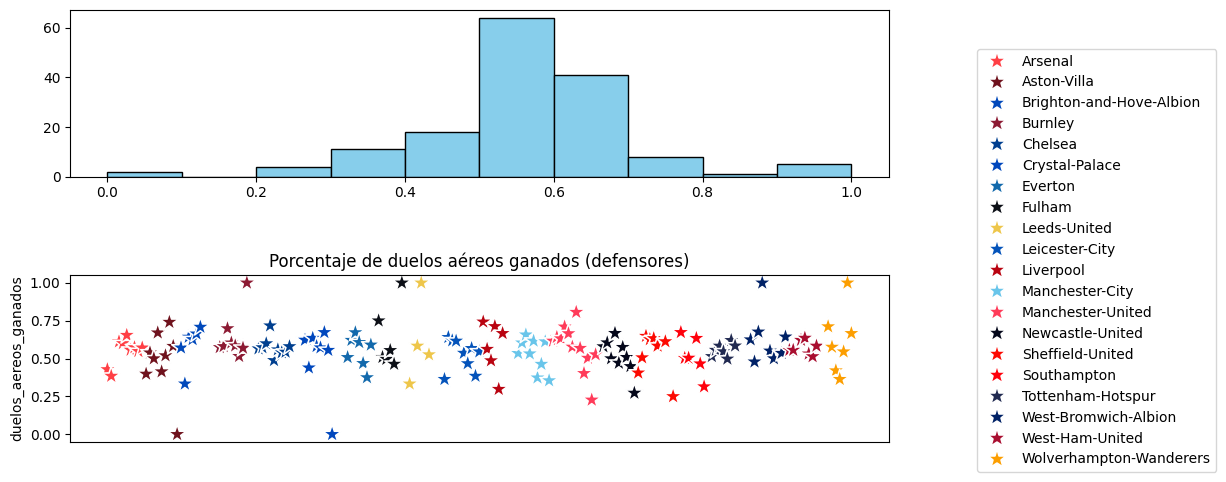

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plt.tight_layout(pad = 5)
paleta= ["#FF3F45","#6F121D", "#0048BB", "#8C1A33","#003F8F","#0047BD", "#1269AC","#0C0F16","#EEC64A","#0453BA","#B90310", "#69C5EA", "#FF3B59", "#04071A","#FC0901", "#FF010C","#212A51","#002166", "#A90E30","#FC9E00"]
axes[0].hist(df[df["Position"] == "Defender"]['duelos_aereos_ganados'], bins= 10, color='skyblue', edgecolor='black');
sns.scatterplot(data = df[df["Position"] == "Defender"], x= "Name", y = "duelos_aereos_ganados", marker= '*', s = 200, hue="Club", palette=paleta, ax = axes[1]);
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.xlabel(None)
plt.title("Porcentaje de duelos aéreos ganados (defensores)")
plt.legend (fontsize = "10", bbox_to_anchor=(1.1,2.4));

Análogamente, se procede a observar los outliers. Nuevamente y como era de esperar, todos se deben al bajo número de muestras.

In [ ]:
df.loc[df['duelos_aereos_ganados'] == 1]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,vallas_invictas_por_partido,duelos_aereos_ganados,pases_largos_por_partido
101,Jimmy Dunne,34.0,Burnley,Defender,Ireland,22.0,1,0,1,1,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,4.0,0.0,0%,0.0,0.0,2.0,8.0,4.0,0.0,3.0,9.0,2.0,0.0,7.0,0.0,0.0,0.0,0,25,25.0,0.0,0.0,0%,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,0.0,1.0,2.0
213,Kenny Tete,2.0,Fulham,Defender,Netherlands,24.0,1,0,1,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,4.0,3.0,67%,0.0,0.0,4.0,3.0,2.0,0.0,4.0,6.0,5.0,0.0,3.0,0.0,0.0,0.0,1,27,27.0,1.0,6.0,50%,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,3,0.0,0.0,1.0,0.0
234,Pascal Struijk,21.0,Leeds-United,Defender,Netherlands,21.0,1,0,1,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,4.0,4.0,25%,0.0,0.0,3.0,11.0,4.0,0.0,4.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0,59,59.0,0.0,0.0,0%,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,1.0,8.0
242,Stuart Dallas,15.0,Leeds-United,Midfielder,Northern Ireland,29.0,2,1,1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,NaN,NaN,12.0,67%,NaN,0.0,4.0,7.0,2.0,NaN,18.0,19.0,5.0,2.0,1.0,0.0,NaN,0.0,0,101,50.5,0.0,1.0,1%,1.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,NaN,1.0,3.5
498,Semi Ajayi,6.0,West-Bromwich-Albion,Defender,Nigeria,26.0,2,0,2,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,8.0,0.0,0%,0.0,0.0,2.0,3.0,2.0,0.0,9.0,1.0,7.0,0.0,1.0,0.0,0.0,0.0,0,54,27.0,0.0,0.0,0%,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,2,0.0,0.0,1.0,2.5
509,Romaine Sawyers,19.0,West-Bromwich-Albion,Midfielder,Saint Kitts And Nevis,28.0,2,0,2,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0%,0.0,0.0,NaN,NaN,2.0,2%,NaN,0.0,2.0,1.0,1.0,NaN,9.0,6.0,9.0,0.0,2.0,0.0,NaN,0.0,0,63,31.5,0.0,0.0,0%,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0.0,NaN,1.0,1.5
556,Oskar Buur,59.0,Wolverhampton-Wanderers,Defender,Denmark,22.0,1,1,0,0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0,14,14.0,0.0,0.0,0%,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,0.0,1.0,0.0


### Pases largos precisos por partido

In [ ]:
# Al igual que para las vallas invictas, se crea la variable para independizarse de la cantidad de partidos jugados.

pases_largos_por_partido = df['Accurate long balls']/df['Appearances']
df['pases_largos_por_partido'] = pases_largos_por_partido
pases_largos_por_partido.mean()

2.4976413300080083

In [ ]:
df.loc[(df['pases_largos_por_partido'] >= 4) & (df['Position'] == 'Defender') & (df['Appearances'] >= 5)] 

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,vallas_invictas_por_partido,duelos_aereos_ganados,pases_largos_por_partido
10,David Luiz,23.0,Arsenal,Defender,Brazil,33.0,194,113,38,13,NaN,6.0,6.0,1.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,64.0,173.0,240.0,74%,4.0,59.0,344.0,832.0,443.0,2.0,1042.0,846.0,680.0,80.0,344.0,256.0,1.0,4.0,7,10165,52.40,22.0,67.0,28%,79.0,980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,3,212,5.0,0.329897,0.573333,5.051546
64,Lewis Dunk,5.0,Brighton-and-Hove-Albion,Defender,England,28.0,112,28,49,6,NaN,3.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,27.0,162.0,151.0,56%,4.0,16.0,173.0,547.0,304.0,4.0,725.0,560.0,362.0,15.0,345.0,192.0,4.0,2.0,5,5364,47.89,3.0,10.0,20%,6.0,506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,1,80,1.0,0.241071,0.642458,4.517857
117,Antonio Rüdiger,2.0,Chelsea,Defender,Germany,27.0,80,45,21,5,NaN,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,28.0,81.0,93.0,59%,0.0,15.0,72.0,252.0,139.0,2.0,522.0,341.0,289.0,15.0,199.0,153.0,1.0,1.0,1,5738,71.72,5.0,18.0,6%,14.0,364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,73,3.0,0.350000,0.565341,4.550000
291,Virgil van Dijk,4.0,Liverpool,Defender,Netherlands,29.0,159,98,30,14,NaN,11.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,61.0,145.0,184.0,70%,4.0,27.0,278.0,924.0,528.0,2.0,837.0,1083.0,397.0,41.0,776.0,269.0,0.0,3.0,3,10554,66.38,13.0,3.0,33%,11.0,737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,88,4.0,0.383648,0.742584,4.635220
295,Trent Alexander-Arnold,66.0,Liverpool,Defender,England,21.0,95,74,8,6,NaN,0.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,31.0,69.0,158.0,64%,1.0,27.0,114.0,184.0,64.0,1.0,546.0,264.0,319.0,57.0,31.0,73.0,0.0,1.0,26,5323,56.03,32.0,708.0,23%,11.0,394.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,50,10.0,0.326316,0.298077,4.147368
327,Aymeric Laporte,14.0,Manchester-City,Defender,France,26.0,59,50,6,4,NaN,4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,25.0,31.0,63.0,52%,0.0,7.0,70.0,147.0,88.0,0.0,342.0,226.0,144.0,8.0,127.0,79.0,0.0,0.0,3,4957,84.02,1.0,8.0,13%,1.0,274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,40,2.0,0.423729,0.616505,4.644068
354,Harry Maguire,5.0,Manchester-United,Defender,England,27.0,140,50,58,8,NaN,4.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,32.0,195.0,191.0,69%,3.0,23.0,233.0,639.0,396.0,0.0,871.0,895.0,433.0,107.0,494.0,202.0,0.0,1.0,7,7325,52.32,9.0,34.0,15%,6.0,646.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,1,117,17.0,0.228571,0.709770,4.614286
384,Fabian Schär,5.0,Newcastle-United,Defender,Switzerland,28.0,46,17,21,6,NaN,1.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,11.0,60.0,99.0,61%,0.0,7.0,114.0,209.0,106.0,2.0,225.0,268.0,229.0,30.0,99.0,99.0,0.0,2.0,1,1755,38.15,1.0,29.0,10%,5.0,228.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,0,57,3.0,0.239130,0.500000,4.956522
419,Phil Jagielka,15.0,Sheffield-United,Defender,England,38.0,366,147,111,18,NaN,10.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,107.0,405.0,703.0,76%,24.0,39.0,618.0,2974.0,1075.0,10.0,1626.0,1842.0,928.0,35.0,783.0,495.0,6.0,6.0,9,14775,40.37,8.0,131.0,30%,11.0,1830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,2,159,3.0,0.292350,0.612676,5.000000
465,Toby Alderweireld,4.0,Tottenham-Hotspur,Defender,Belgium,31.0,176,98,42,8,NaN,5.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,60.0,158.0,226.0,74%,2.0,27.0,183.0,976.0,462.0,4.0,824.0,556.0,442.0,26.0,282.0,266.0,2.0,1.0,4,10036,57.02,5.0,57.0,28%,22.0,1081.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

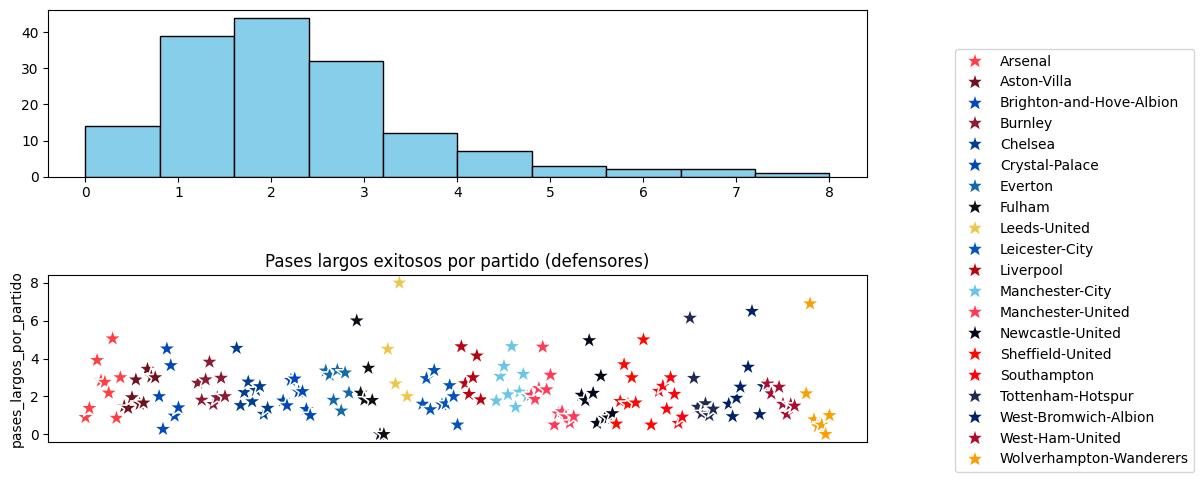

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
plt.tight_layout(pad = 5)
paleta= ["#FF3F45","#6F121D", "#0048BB", "#8C1A33","#003F8F","#0047BD", "#1269AC","#0C0F16","#EEC64A","#0453BA","#B90310", "#69C5EA", "#FF3B59", "#04071A","#FC0901", "#FF010C","#212A51","#002166", "#A90E30","#FC9E00"]
axes[0].hist(df[df["Position"] == "Defender"]['pases_largos_por_partido'], bins= 10, color='skyblue', edgecolor='black');
sns.scatterplot(data = df[df["Position"] == "Defender"], x= "Name", y = "pases_largos_por_partido", marker= '*', s = 200, hue="Club", palette=paleta, ax = axes[1]);
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
plt.xlabel(None)
plt.title("Pases largos exitosos por partido (defensores)")
plt.legend (fontsize = "10", bbox_to_anchor=(1.1,2.4))

### Conclusiones

Si bien ya se puede ver observando las tablas anteriores, se procede a encontrar un jugador que esté por encima de los valores fijados en las tres categorías en simultáneo.

In [ ]:
df.loc[(df['Position'] == 'Defender') & (df['vallas_invictas_por_partido'] >= 0.38) & 
(df['duelos_aereos_ganados'] >= 0.7) & (df['pases_largos_por_partido'] >= 4)]

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Goals per match,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Shooting accuracy %,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,vallas_invictas_por_partido,duelos_aereos_ganados,pases_largos_por_partido
291,Virgil van Dijk,4.0,Liverpool,Defender,Netherlands,29.0,159,98,30,14,NaN,11.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,12.0,NaN,61.0,145.0,184.0,70%,4.0,27.0,278.0,924.0,528.0,2.0,837.0,1083.0,397.0,41.0,776.0,269.0,0.0,3.0,3,10554,66.38,13.0,3.0,33%,11.0,737.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,1,88,4.0,0.383648,0.742584,4.63522


Virgil van Dijk resulta ser el mejor defensor de la Premier League al año 2020. Esto es un resultado muy esperable si se conoce un poco su situación en ese entonces. En la temporada 2019/2020, su equipo, el Liverpool, se coronó campeón de Inglaterra. No solo eso, sino que fue al que menos goles le anotaron. Además, en el año 2019 fue nombrado segundo mejor jugador del mundo por la prestigiosa revista France Football, apenas por debajo de Lionel Messi, nada más y nada menos. Por último, en el año 2020 el Liverpool se coronó campeón de Europa y del mundo, con van Dijk como capitán y una de sus principales figuras. Por todo esto, podemos afirmar que el análisis observado se condice con la realidad. 

# ARQUEROS

Para el caso de los arqueros nuestro análisis se enfocará en buscar aquellos con mejor juego con los pies. Para eso, consideramos que deben tener más de 25 pases por partido, menos de un "Error leading to goal" cada 1000 pases y más de 5 "Accurate long balls" por patido.

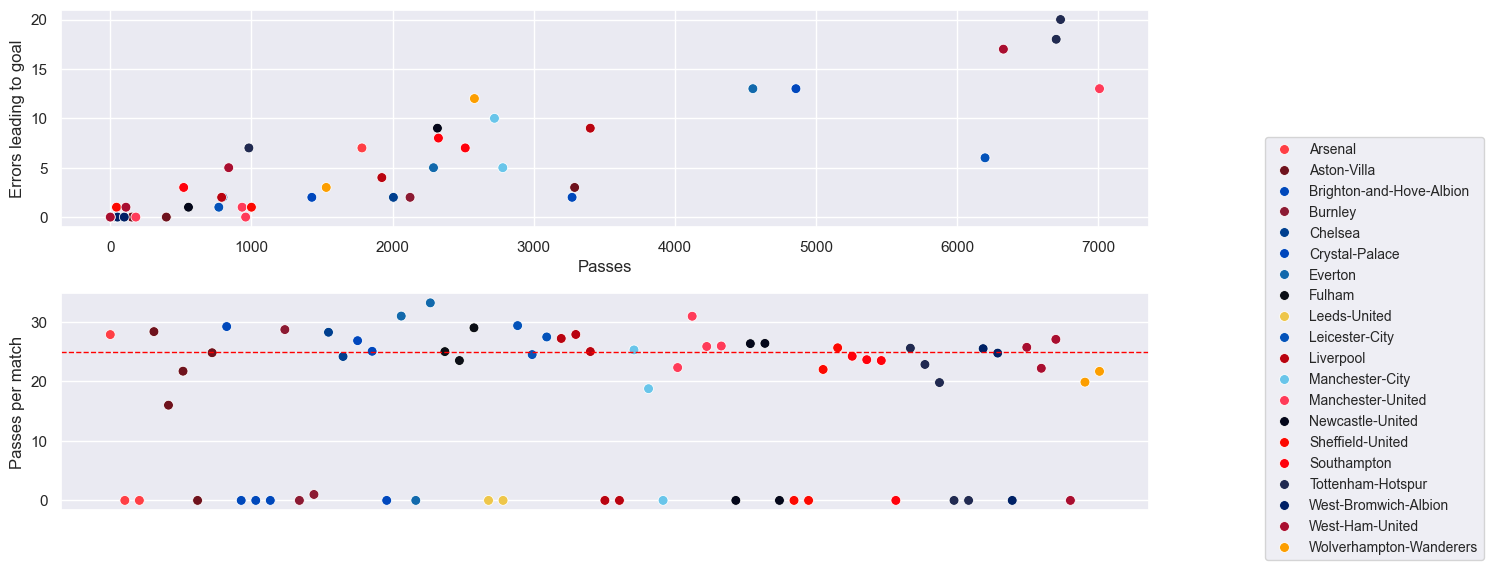

In [91]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
plt.tight_layout(pad = 2)

sns.scatterplot(data = df[df["Position"] == "Goalkeeper"], x= "Name", y = "Passes per match", marker= 'o', s = 50, hue="Club", palette=paleta,ax = axes[1]);
plt.axhline(y=25, color='red', linestyle='--', linewidth=1)

paleta= ["#FF3F45","#6F121D", "#0048BB", "#8C1A33","#003F8F","#0047BD", "#1269AC","#0C0F16","#EEC64A","#0453BA","#B90310", "#69C5EA", "#FF3B59", "#04071A","#FC0901", "#FF010C","#212A51","#002166", "#A90E30","#FC9E00"]
sns.scatterplot(data = df[df["Position"] == "Goalkeeper"], x= "Passes", y = "Errors leading to goal", marker= 'o', s = 50, hue="Club", palette=paleta,legend=False,ax = axes[0]);
plt.xticks([])
plt.xlabel(None)
plt.legend (fontsize = "10", bbox_to_anchor=(1.1, 1.75));

In [95]:
Arqueros_con_buen_pie = df.loc[(df["Passes per match"]>=25)&(df["Position"]=="Goalkeeper")&(df["Errors leading to goal"]*1000<df["Passes"])&(df["Accurate long balls"]>df["Appearances"]*5)]
Arqueros_con_buen_pie

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,Headed goals,Goals with right foot,Goals with left foot,Penalties scored,Freekicks scored,Shots,Shots on target,Hit woodwork,Big chances missed,Clean sheets,Goals conceded,Tackles,Tackle success %,Last man tackles,Blocked shots,Interceptions,Clearances,Headed Clearance,Clearances off line,Recoveries,Duels won,Duels lost,Successful 50/50s,Aerial battles won,Aerial battles lost,Own goals,Errors leading to goal,Assists,Passes,Passes per match,Big chances created,Crosses,Cross accuracy %,Through balls,Accurate long balls,Saves,Penalties saved,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides,Goles por partido,Precision en tiros %,vallas_invictas_por_partido
30,Tom Heaton,1.00,Aston-Villa,Goalkeeper,England,34.00,116,34,55,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.00,167.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,3.00,0,3290,28.36,NaN,NaN,NaN,NaN,1067.00,408.00,3.00,40.00,96.00,73.00,53.00,436.00,1023.00,5,0,2,NaN,0.00,NaN,0.24
58,Mat Ryan,1.00,Brighton-and-Hove-Albion,Goalkeeper,Australia,28.00,112,27,50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.00,166.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0,3272,29.21,NaN,NaN,NaN,NaN,964.00,340.00,2.00,32.00,68.00,17.00,15.00,491.00,956.00,2,0,2,NaN,0.00,NaN,0.23
91,Nick Pope,1.00,Burnley,Goalkeeper,England,28.00,74,28,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.00,89.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,2.00,0,2124,28.70,NaN,NaN,NaN,NaN,647.00,237.00,2.00,29.00,100.00,18.00,45.00,300.00,605.00,4,0,1,NaN,0.00,NaN,0.35
204,Marek Rodák,12.00,Fulham,Goalkeeper,Slovakia,23.00,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0,25,25.00,NaN,NaN,NaN,NaN,8.00,2.00,0.00,0.00,0.00,0.00,1.00,2.00,4.00,0,0,0,NaN,0.00,NaN,0.00
255,Kasper Schmeichel,1.00,Leicester-City,Goalkeeper,Denmark,33.00,211,91,69,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.00,264.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,6.00,0,6198,29.37,NaN,NaN,NaN,NaN,1880.00,599.00,5.00,101.00,158.00,84.00,142.00,655.00,1718.00,11,0,0,NaN,0.00,NaN,0.31
348,Lee Grant,NaN,Manchester-United,Goalkeeper,England,37.00,31,10,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.00,41.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0,959,30.94,NaN,NaN,NaN,NaN,365.00,99.00,0.00,21.00,24.00,16.00,21.00,114.00,301.00,1,0,0,NaN,0.00,NaN,0.29
349,Sergio Romero,22.00,Manchester-United,Goalkeeper,Argentina,33.00,7,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0,181,25.86,NaN,NaN,NaN,NaN,54.00,20.00,1.00,1.00,10.00,2.00,5.00,39.00,38.00,0,0,0,NaN,0.00,NaN,0.86
492,Sam Johnstone,1.00,West-Bromwich-Albion,Goalkeeper,England,27.00,2,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0,51,25.50,NaN,NaN,NaN,NaN,16.00,6.00,0.00,0.00,0.00,0.00,0.00,11.00,14.00,0,0,0,NaN,0.00,NaN,0.00


De esta forma nos quedamos con los arqueros que según los criterios mencionados previamente, tienen un buen rendimiento en una cualidad en particular cada vez más deseada para los arqueros: Su juego con los pies. 